# plaitpy PoC for diabetes dataset

Using [Diabetes dataset](https://www.kaggle.com/datasets/mathchi/diabetes-data-set) for exploring very simple single table mock data use case.

### Requirements

As a **data engineer**, I should be able to specify what is already public to the data scientist and include only that information to the mock dataset.
Let's specify **public data** for diabetes dataset:
* Pregnancies: integer, mean 3.8
* Age: integer, between 18 and 100, gamma distribution
* Outcome: boolean (0, 1), 35% true (1)
* Other columns should be dropped

In [63]:
import random
random.gammavariate(2.5, 10)

20.01259941616974

In [92]:
template = """
define:
      min_age: 18

fields:
      Pregnancies:
        random: gauss(3.8, 4)
        finalize: int(max(0, value))
      Age:
        random: gammavariate(2.5, 10)
        finalize: int(max($min_age, value))
      Outcome:
        random: choices([0, 1], weights=[65, 35], k=1)
        finalize: value[0]

        
"""
with open("diabetes/diabetes-template.yaml", 'w') as file:
    file.write(template)


In [93]:
!plait diabetes/diabetes-template.yaml --csv --num 100 > diabetes/generated.csv

import pandas as pd
generated = pd.read_csv("diabetes/generated.csv")
generated.head()

,Pregnancies,Age,Outcome
0,7,29,1
1,2,31,1
2,4,39,0
3,4,18,1
4,8,18,0


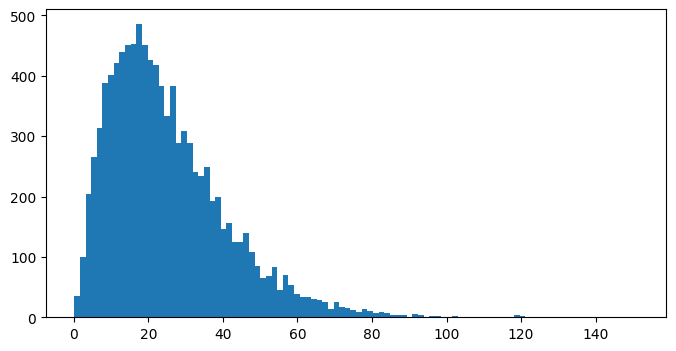

In [94]:
import matplotlib.pyplot as plt
import random
plt.figure(figsize = (8, 4))
plt.hist([random.gammavariate(2.5, 10) for i in range(10000)], bins = 100)
plt.show()

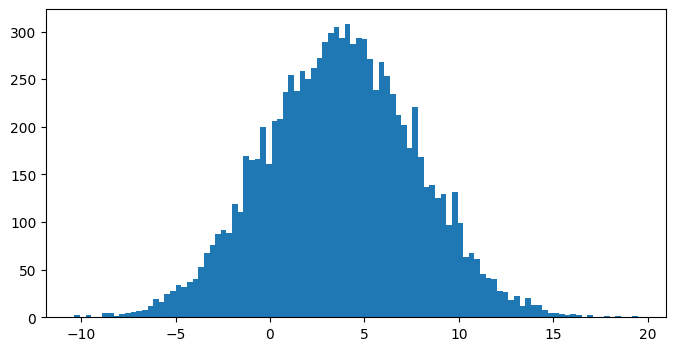

In [95]:
plt.figure(figsize = (8, 4))
plt.hist([random.gauss(3.8, 4) for i in range(10000)], bins = 100)
plt.show()

In [96]:
def plot_histograms(df, title):
    fig, axs = plt.subplots(1, 3, figsize=(10, 5))

    df['Pregnancies'].plot(kind='hist', bins=10, ax=axs[0])
    axs[0].set_xlabel('Pregnancies')
    axs[0].set_title('Histogram of Pregnancies')

    df['Age'].plot(kind='hist', bins=10, ax=axs[1])
    axs[1].set_xlabel('Age')
    axs[1].set_title('Histogram of Age')

    df['Outcome'].plot(kind='hist', bins=10, ax=axs[2])
    axs[2].set_xlabel('Outcome')
    axs[2].set_title('Histogram of Outcome')

    plt.suptitle(title)
    plt.show()


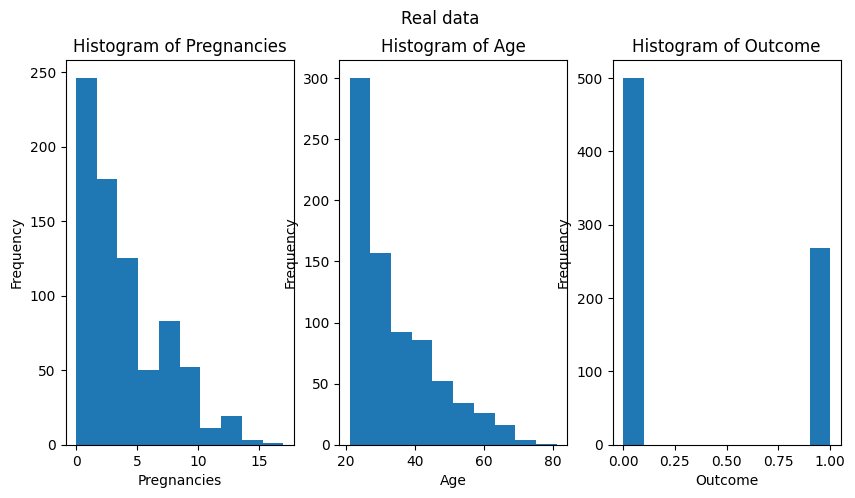

In [97]:
df = pd.read_csv("diabetes/diabetes.csv")
plot_histograms(df, "Real data")

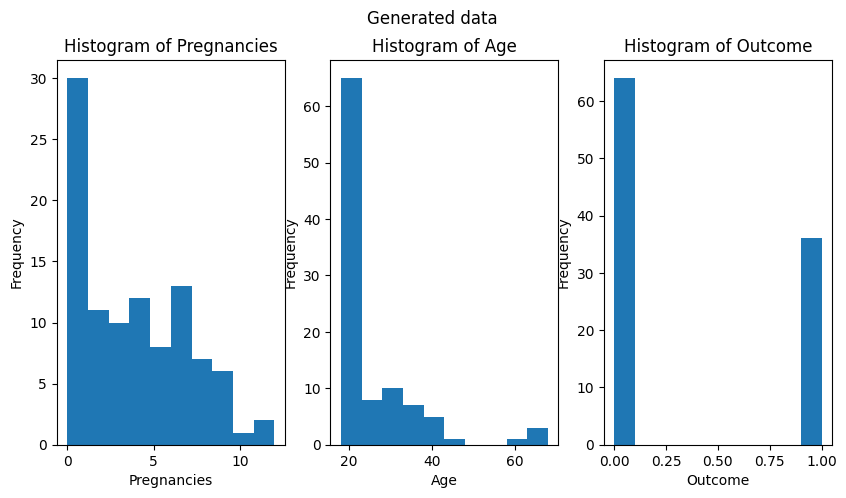

In [98]:
plot_histograms(generated, "Generated data")